In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [2]:
df = pd.read_excel("./AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

In [4]:
df.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [5]:
l = []
for i in range(2,len(df.columns)) :
    col = df.columns[i]
    count = 0
    for j in range(len(df[col])):
        if df[col][j] < 0 :
            count += 1
    l.append((col,count))
l

[('CO(GT)', 1683),
 ('PT08.S1(CO)', 366),
 ('NMHC(GT)', 8443),
 ('C6H6(GT)', 366),
 ('PT08.S2(NMHC)', 366),
 ('NOx(GT)', 1639),
 ('PT08.S3(NOx)', 366),
 ('NO2(GT)', 1642),
 ('PT08.S4(NO2)', 366),
 ('PT08.S5(O3)', 366),
 ('T', 380),
 ('RH', 366),
 ('AH', 366),
 ('Unnamed: 15', 0),
 ('Unnamed: 16', 0)]

In [6]:
numeric = df._get_numeric_data()
numeric[numeric<0] = 0
print(df.describe())
df.tail()

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      1.765545  1056.692672    21.373731     9.688596     902.298983   
std       1.554264   301.232260    91.103489     7.559609     318.681183   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.600000   921.000000     0.000000     4.004958     711.000000   
50%       1.500000  1052.500000     0.000000     7.886653     894.500000   
75%       2.600000  1221.250000     0.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    203.636796    802.695353    93.232617   1399.186287   982.774554   
std     214.984126    299.341439    61.468588    441.442059   438.060087   
min       0

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824,NaN,NaN
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864,NaN,NaN
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649,NaN,NaN
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866,NaN,NaN
9356,2005-04-04,14:00:00,2.2,1070.75,0,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804,NaN,NaN


In [7]:
for i in range(2,len(df.columns)) :
    col = df.columns[i]
    m = np.mean(df[col])
#     print(col,m)
    for j in range(len(df[col])):
        if df[col][j] == 0 :
            df.loc[j,col] = m
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [8]:
cdf = df[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]
cdf.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.000000,1056.25,1692.00,1267.50,13.600,48.875001
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.000000,1173.75,1558.75,972.25,13.300,47.700000
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.000000,1140.00,1554.50,1074.00,11.900,53.975000
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.000000,1092.00,1583.75,1203.25,11.000,60.000000
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.000000,1205.00,1490.00,1110.00,11.150,59.575001
5,2004-03-10,23:00:00,1.2,1197.00,38.0,4.741012,750.25,89.000000,1336.50,1393.00,949.25,11.175,59.175000
6,2004-03-11,00:00:00,1.2,1185.00,31.0,3.624399,689.50,62.000000,1461.75,1332.75,732.50,11.325,56.775000
7,2004-03-11,01:00:00,1.0,1136.25,31.0,3.326677,672.00,62.000000,1453.25,1332.75,729.50,10.675,60.000000
8,2004-03-11,02:00:00,0.9,1094.00,24.0,2.339416,608.50,45.000000,1579.00,1276.00,619.50,10.650,59.674999
9,2004-03-11,03:00:00,0.6,1009.75,19.0,1.696658,560.75,203.636796,1705.00,1234.75,501.25,10.250,60.200001


In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 950.4+ KB


In [10]:
# duplicate = cdf[cdf.duplicated()]
# print(duplicate)
cdf.duplicated().sum()

0

# Visualization

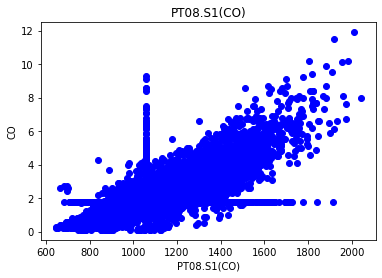

In [11]:
plt.scatter(cdf['PT08.S1(CO)'] ,cdf['CO(GT)'],  color='blue')
plt.ylabel("CO")
plt.xlabel("PT08.S1(CO)")
plt.title("PT08.S1(CO)")
plt.show()

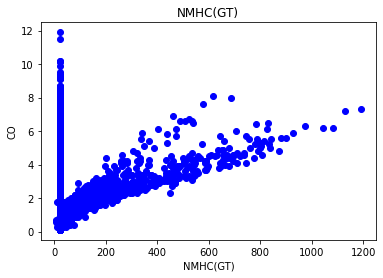

In [12]:
plt.scatter(cdf['NMHC(GT)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("NMHC(GT)")
plt.ylabel("CO")
plt.title('NMHC(GT)')
plt.show()

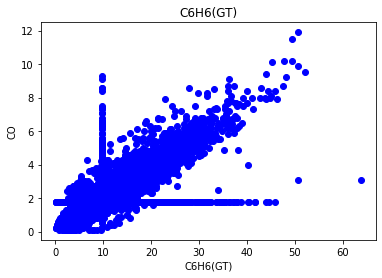

In [13]:
plt.scatter(cdf['C6H6(GT)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("C6H6(GT)")
plt.ylabel("CO")
plt.title('C6H6(GT)')
plt.show()

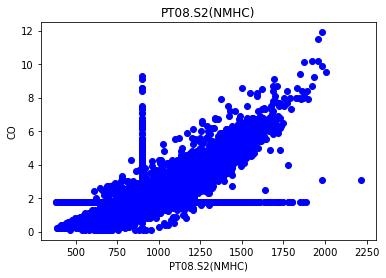

In [14]:
plt.scatter(cdf['PT08.S2(NMHC)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("PT08.S2(NMHC)")
plt.ylabel("CO")
plt.title('PT08.S2(NMHC)')
plt.show()

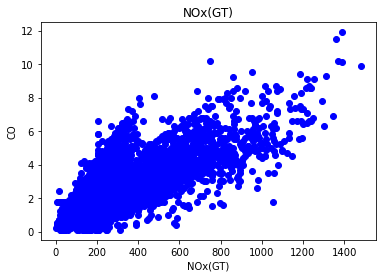

In [15]:
plt.scatter(cdf['NOx(GT)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("NOx(GT)")
plt.ylabel("CO")
plt.title('NOx(GT)')
plt.show()

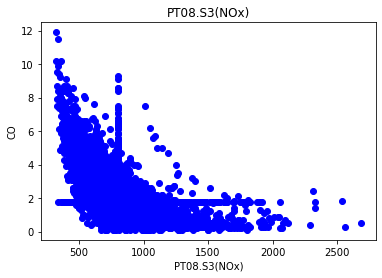

In [16]:
plt.scatter(cdf['PT08.S3(NOx)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("PT08.S3(NOx)")
plt.ylabel("CO")
plt.title('PT08.S3(NOx)')
plt.show()

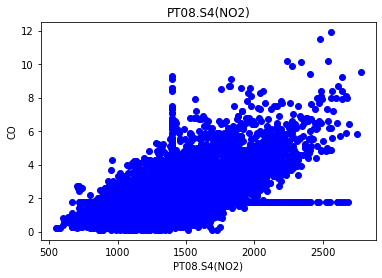

In [17]:
plt.scatter(cdf['PT08.S4(NO2)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("PT08.S4(NO2)")
plt.ylabel("CO")
plt.title('PT08.S4(NO2)')
plt.show()

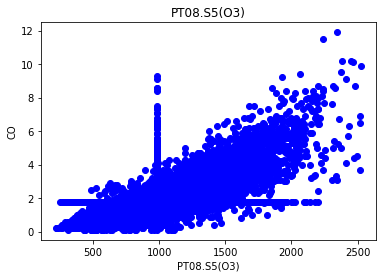

In [18]:
plt.scatter(cdf['PT08.S5(O3)'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("PT08.S5(O3)")
plt.ylabel("CO")
plt.title('PT08.S5(O3)')
plt.show()

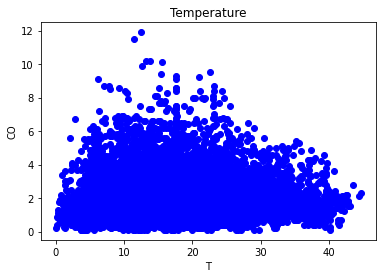

In [19]:
plt.scatter(cdf['T'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("T")
plt.ylabel("CO")
plt.title('Temperature')
plt.show()

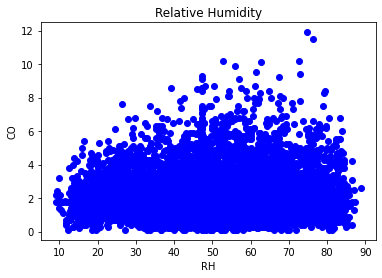

In [20]:
plt.scatter(cdf['RH'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("RH")
plt.ylabel("CO")
plt.title('Relative Humidity')
plt.show()

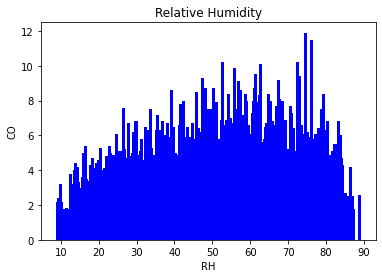

In [21]:
plt.bar(cdf['RH'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("RH")
plt.ylabel("CO")
plt.title('Relative Humidity')
plt.show()

In [22]:
cdf["Time_in_hrs"] = (cdf["Time"].astype(str).str.slice(0,2)).astype(int)
cdf

<ipython-input-22-69ed800bde31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["Time_in_hrs"] = (cdf["Time"].astype(str).str.slice(0,2)).astype(int)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,Time_in_hrs
0,2004-03-10,18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,1692.00,1267.50,13.600,48.875001,18
1,2004-03-10,19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,1558.75,972.25,13.300,47.700000,19
2,2004-03-10,20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,1554.50,1074.00,11.900,53.975000,20
3,2004-03-10,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,1583.75,1203.25,11.000,60.000000,21
4,2004-03-10,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,1490.00,1110.00,11.150,59.575001,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,21.373731,13.529605,1101.25,471.7,538.50,1374.25,1728.50,21.850,29.250000,10
9353,2005-04-04,11:00:00,2.4,1162.50,21.373731,11.355157,1027.00,353.3,603.75,1263.50,1269.00,24.325,23.725000,11
9354,2005-04-04,12:00:00,2.4,1142.00,21.373731,12.374538,1062.50,293.0,603.25,1240.75,1092.00,26.900,18.350000,12
9355,2005-04-04,13:00:00,2.1,1002.50,21.373731,9.547187,960.50,234.5,701.50,1041.00,769.75,28.325,13.550000,13


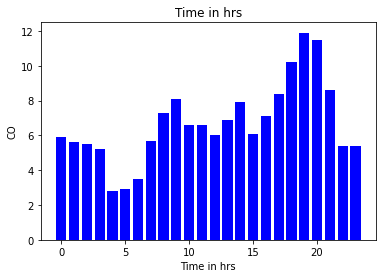

In [23]:
plt.bar(cdf['Time_in_hrs'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("Time in hrs")
plt.ylabel("CO")
plt.title('Time in hrs')
plt.show()

In [24]:
cdf["date"] = df["Date"].dt.month
cdf

<ipython-input-24-f5f032f11b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["date"] = df["Date"].dt.month


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,Time_in_hrs,date
0,2004-03-10,18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,1692.00,1267.50,13.600,48.875001,18,3
1,2004-03-10,19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,1558.75,972.25,13.300,47.700000,19,3
2,2004-03-10,20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,1554.50,1074.00,11.900,53.975000,20,3
3,2004-03-10,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,1583.75,1203.25,11.000,60.000000,21,3
4,2004-03-10,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,1490.00,1110.00,11.150,59.575001,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,21.373731,13.529605,1101.25,471.7,538.50,1374.25,1728.50,21.850,29.250000,10,4
9353,2005-04-04,11:00:00,2.4,1162.50,21.373731,11.355157,1027.00,353.3,603.75,1263.50,1269.00,24.325,23.725000,11,4
9354,2005-04-04,12:00:00,2.4,1142.00,21.373731,12.374538,1062.50,293.0,603.25,1240.75,1092.00,26.900,18.350000,12,4
9355,2005-04-04,13:00:00,2.1,1002.50,21.373731,9.547187,960.50,234.5,701.50,1041.00,769.75,28.325,13.550000,13,4


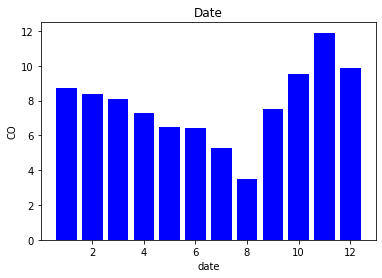

In [25]:
plt.bar(cdf['date'] ,cdf['CO(GT)'],  color='blue')
plt.xlabel("date")
plt.ylabel("CO")
plt.title('Date')
plt.show()

# Multiple Linear Regression

In [26]:
X = cdf.iloc[:,3:15].values
Y = cdf.iloc[:,2].values
# print(X)
# print(Y)
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
msk

array([ True,  True,  True, ...,  True,  True, False])

In [27]:
# # split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [28]:
# Modelling
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(X_train)
y = np.asanyarray(Y_train)
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [ 4.80530570e-04  1.94369623e-03  6.79936466e-02 -1.52694186e-03
  4.04767852e-03 -3.01069691e-05  1.44123167e-03 -9.00418258e-05
 -2.60873330e-02 -1.08455904e-02  1.46588684e-02  1.15661026e-02]
Intercept:  0.04921929668891023


In [29]:
y_hat= regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(Y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.31
Variance score: 0.82


In [30]:
X_test.shape

(3119, 12)

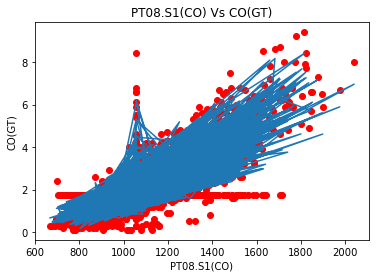

In [31]:
li = []
for i in range(3119) :
    li.append(X_test[i][0])
plt.scatter(li,Y_test,color='r')
plt.plot(li,regr.predict(X_test))
plt.title("PT08.S1(CO) Vs CO(GT)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel("CO(GT)")
plt.show()